In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

clearview = open('logs/sample_clearview.json')
clearview_data = json.load(clearview)

dehazenet = open('logs/sample_dehazenet.json')
dehazenet_data = json.load(dehazenet)

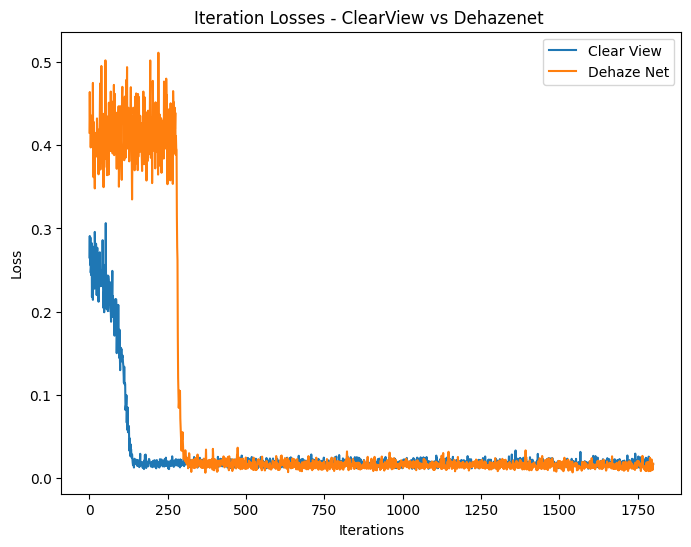

In [11]:
plt.figure(figsize=(8,6))

plt.plot(clearview_data["iteration_losses"][:1800], label = "Clear View")
plt.plot(dehazenet_data["iteration_losses"][:1800], label = "Dehaze Net")
plt.legend()

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Iteration Losses - ClearView vs Dehazenet ")
plt.savefig("plots/training_losses")

23.040508270263672
23.99806785583496


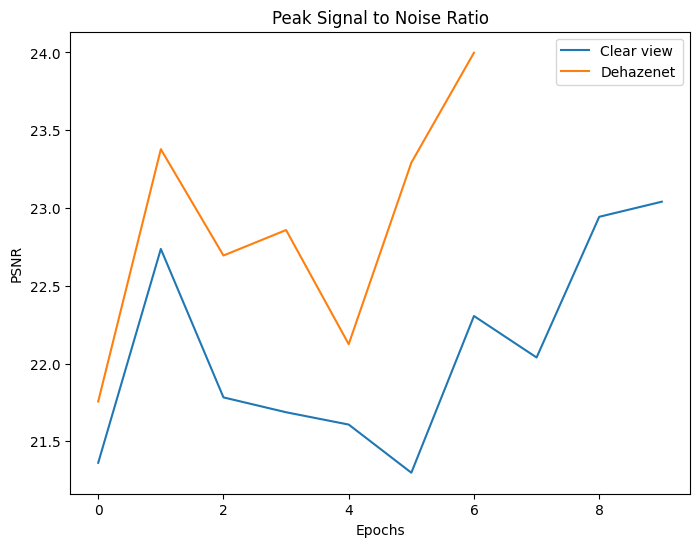

In [7]:
plt.figure(figsize=(8,6))

print(max(clearview_data["psnr_values"]))
print(max(dehazenet_data["psnr_values"]))

plt.plot(clearview_data["psnr_values"], label = "Clear view ")
plt.plot(dehazenet_data["psnr_values"], label = "Dehazenet")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("PSNR")
plt.title("Peak Signal to Noise Ratio")
plt.savefig("plots/psnr")

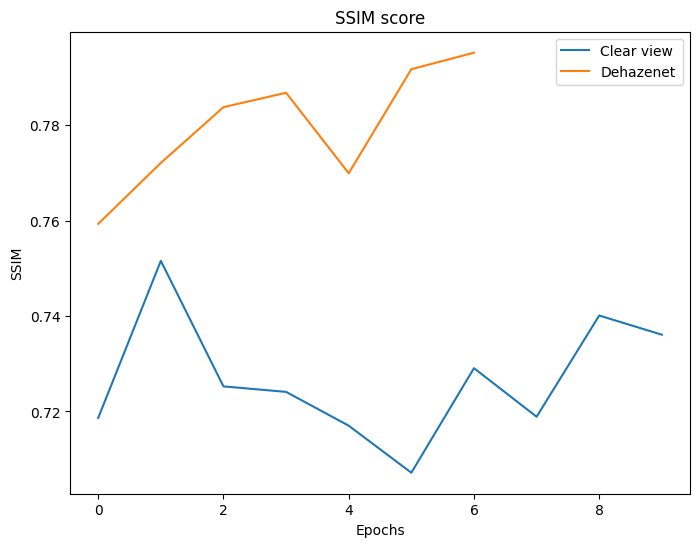

In [9]:
plt.figure(figsize=(8,6))

# print(mse)
plt.plot(clearview_data["ssim_values"], label = "Clear view ")
plt.plot(dehazenet_data["ssim_values"], label = "Dehazenet")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("SSIM")
plt.title("SSIM score")
plt.savefig("plots/ssim")